In [1]:
import glob,sys,os,re
import numpy as np
import pandas as pd
from mylab.Functions import *
from core.Cdatabase import *
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
db = DataBase()

# context_map

In [2]:
context_map = pd.read_csv(r"context_map.csv")

In [3]:
context_map

,Unnamed: 0,mouse_id,part,aim,index,ctx_0,ctx_1,ctx_2,rule_0,rule_1,rule_2
0,249,206553,1,ce,20200721-142122,A,B,C,left,left,left
1,176,206551,1,ce,20200721-150926,A,B,C,left,left,left
2,116,206548,1,ce,20200721-155255,A,B,C,left,left,left
3,210,206552,1,ce,20200721-162523,A,B,C,left,left,left
4,146,206550,1,ce,20200721-170601,A,B,C,left,left,left
...,...,...,...,...,...,...,...,...,...,...,...
285,40,201033,6,test,20200908-192132,B,A,C,left,right,None
286,42,201033,6,test,20200909-144959,B,A,C,left,right,None
287,41,201033,6,all_blank,20200909-150837,B,A,C,left,right,None
288,289,206553,6,test,20200909-155313,B,A,C,left,right,None


## index celltypes

In [4]:
celltypes = db.index_celltypes(part=6)
celltypes = [i for i in celltypes if "aim_test"  in i ]
# celltypes_2020061 = [i for i in celltypes if "20200805" in i or "20200806" in i or "20200807" in i];
celltypes

['\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200901_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200902_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200904_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200905_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200906_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200908_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_201033_part6_day20200909_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_206551_part6_day20200901_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_206551_part6_day20200902_aim_test.pkl',
 

In [7]:
mouseids = ["206551","206552","206553"]

Celltypes = {}
for mouseid in mouseids:
    Celltypes[mouseid] = [i for i in celltypes if mouseid in i][0:3]

In [8]:
Celltypes["206551"]

['\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_206551_part6_day20200901_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_206551_part6_day20200902_aim_test.pkl',
 '\\\\10.10.47.163\\qiushou\\LinearTrack\\results\\celltypes\\celltype_206551_part6_day20200904_aim_test.pkl']

## wenn fig for single day

### calculate the proportion and mean

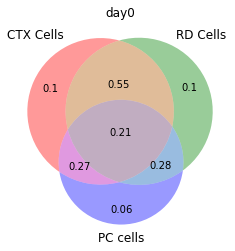

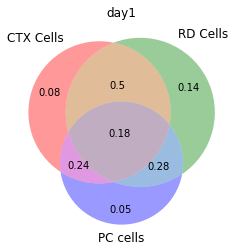

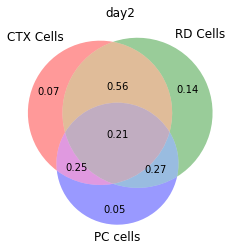

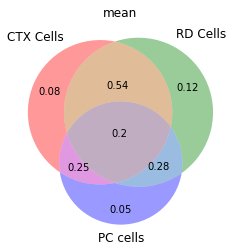

In [11]:
%matplotlib inline
wenn_lists_aves=[]
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    wenn_lists=[]
    for celltype_file in celltype_files:
        ct = CellType(celltype_file)
        contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=[0,1])
        
        contextcell_ids= list(set(contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]))
        rdcell_ids = list(set(rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]))
        pccell_ids = list(set(pccell_id["context0_pccells"] + pccell_id["context1_pccells"]))
#         print(rdcell_ids)
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

        pc_cellids = list(set(spread(pccell_id.values())))        
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        
        only_ctx_cellids = [i for i in ctx_cellids if not i in rd_cellids and not i in pc_cellids]
        only_rd_cellids = [i for i in rd_cellids if not i in ctx_cellids and not i in pc_cellids]
        only_pc_cellids = [i for i in pc_cellids if not i in rd_cellids and not i in ctx_cellids ]
    
        wenn_list = [len(only_ctx_cellids)/total_cell_num
                     ,len(only_rd_cellids)/total_cell_num
                     ,len(ctx_rd_cellids)/total_cell_num
                     ,len(only_pc_cellids)/total_cell_num
                     ,len(ctx_pc_cellids)/total_cell_num
                     ,len(rd_pc_cellids)/total_cell_num
                     ,len(ctx_rd_pc_cellids)/total_cell_num]
        
        
        wenn_lists.append(wenn_list)
    wenn_lists_ave = np.mean(wenn_lists,axis=0)
    wenn_lists_aves.append(wenn_lists_ave)
    wenn_lists_round2 = [round(i,2) for i in wenn_lists_ave]
    venn3(wenn_lists_round2,set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.savefig(r"C:\Users\Sabri\Pictures\day%s.png"%i,dpi=200)
    plt.show()
wenn_lists_aves_round2 = [round(i,2) for i in np.mean(wenn_lists_aves,axis=0)]
venn3(wenn_lists_aves_round2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("mean")
plt.savefig(r"C:\Users\Sabri\Pictures\mean.png",dpi=200)

### pool all the cells and calculate the proportion

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
1


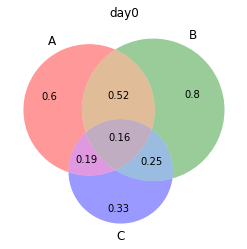

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
2


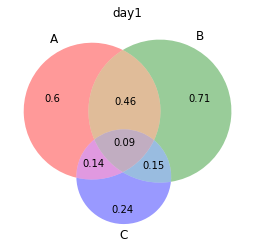

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
3


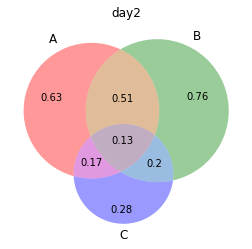

[[0.5957257346393589, 0.8040961709706145, 0.5191451469278717, 0.3330365093499555, 0.19056099732858414, 0.25289403383793413, 0.1620658949243099], [0.6028495102404274, 0.7070347284060552, 0.4577025823686554, 0.24487978628673196, 0.13535173642030277, 0.14692787177203917, 0.0881567230632235], [0.6313446126447017, 0.755120213713268, 0.5138023152270703, 0.27871772039180764, 0.17275155832591274, 0.19768477292965272, 0.13446126447016918]]


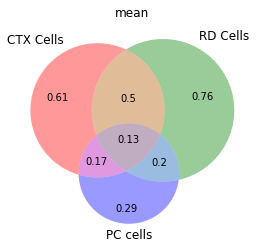

In [30]:
wenn_lists_days=[]
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]

    for celltype_file in celltype_files:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype_file,contexts=[0,1])
        
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    
    ctx_cellids = list(set(spread(contextcell_id.values())))
    rd_cellids = list(set(spread(rdcell_id.values())))
    ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]

    pc_cellids = list(set(spread(pccell_id.values())))        
    ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
    rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

    ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

    wenn_lists = [len(ctx_cellids)/total_cell_num
                 ,len(rd_cellids)/total_cell_num
                 ,len(ctx_rd_cellids)/total_cell_num
                 ,len(pc_cellids)/total_cell_num
                 ,len(ctx_pc_cellids)/total_cell_num
                 ,len(rd_pc_cellids)/total_cell_num
                 ,len(ctx_rd_pc_cellids)/total_cell_num]
    wenn_lists_days.append(wenn_lists)
    print(len(wenn_lists_days))
    wenn_lists_round2 = [round(i,2) for i in wenn_lists]
    venn3(wenn_lists_round2)
#     venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.show()
    
print(wenn_lists_days)
wenn_lists_days_mean = np.mean(wenn_lists_days,axis=0)
wenn_lists_days_mean_round2=[round(i,2) for i in wenn_lists_days_mean]
venn3(wenn_lists_days_mean_round2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("mean")
plt.show()

In [17]:
round(0.23234324,2)

0.23

### count the number

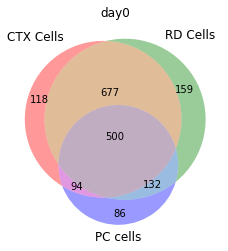

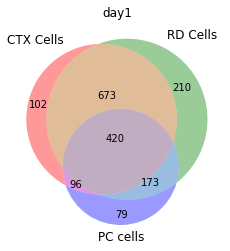

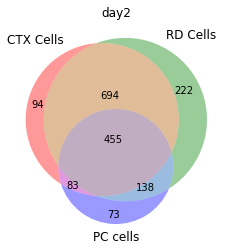

In [12]:


for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    for celltype_file in celltype_files:
        ct = CellType(celltype_file)
        contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=[0,1])
        
        contextcell_ids=contextcell_ids+contextcell_id["ctx0cells"]+contextcell_id["ctx1cells"]
        rdcell_ids = rdcell_ids + rdcell_id["context0_leftcells"]+ rdcell_id["context0_rightcells"]+ rdcell_id["context1_leftcells"]+ rdcell_id["context1_rightcells"]
        pccell_ids = pccell_ids + pccell_id["context0_pccells"] + pccell_id["context1_pccells"]
    
    
    venn3(subsets= [set(contextcell_ids),set(rdcell_ids),set(pccell_ids)],set_labels=("CTX Cells","RD Cells","PC cells"))
    plt.title("day%s"%i)
    plt.savefig(r"C:\Users\Sabri\Pictures\day%s.png"%i,dpi=200)
    plt.show()

## for all mice in 4 days

### construct nums

In [14]:

nums = []
for i in range(3):
    contextcell_ids=[]
    rdcell_ids=[]
    pccell_ids=[]
    celltype_files = [f[i] for f in Celltypes.values()]
    num_per_day=[]
    for celltype_file in celltype_files:
        ct = CellType(celltype_file)
        num_per_mouse = []
        contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=[0,1])
        
        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        pc_cellids = list(set(spread(pccell_id.values())))
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]
        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]
        only_ctx_cellids = [i for i in ctx_cellids if not i in rd_cellids and not i in pc_cellids]
        only_rd_cellids = [i for i in rd_cellids if not i in ctx_cellids and not i in pc_cellids]
        only_pc_cellids = [i for i in pc_cellids if not i in rd_cellids and not i in ctx_cellids ]
        num_per_mouse = [
            len(ctx_cellids)/total_cell_num
            ,len(rd_cellids)/total_cell_num
            ,len(pc_cellids)/total_cell_num
            ,len(ctx_rd_cellids)/total_cell_num
            ,len(ctx_pc_cellids)/total_cell_num
            ,len(rd_pc_cellids)/total_cell_num
            ,len(ctx_rd_pc_cellids)/total_cell_num
            ,len(only_ctx_cellids)/total_cell_num
            ,len(only_rd_cellids)/total_cell_num
            ,len(only_pc_cellids)/total_cell_num
        ]
        num_per_day.append(num_per_mouse)
                             
    nums.append(num_per_day)
nums = np.array(nums) # (day,mouse,type)
nums

array([[[0.62020906, 0.4912892 , 0.41463415, 0.34494774, 0.21254355,
         0.19860627, 0.12543554, 0.18815331, 0.07317073, 0.12891986],
        [0.68307692, 0.80923077, 0.31384615, 0.58461538, 0.21230769,
         0.25230769, 0.18153846, 0.06769231, 0.15384615, 0.03076923],
        [0.80145867, 0.86223663, 0.47893031, 0.71961102, 0.37601297,
         0.39951378, 0.32820097, 0.03403566, 0.0713128 , 0.03160454]],

       [[0.54006969, 0.57839721, 0.36236934, 0.31010453, 0.20557491,
         0.21602787, 0.11149826, 0.1358885 , 0.16376307, 0.05226481],
        [0.59076923, 0.76615385, 0.34769231, 0.50461538, 0.18461538,
         0.25230769, 0.15384615, 0.05538462, 0.16307692, 0.06461538],
        [0.7649919 , 0.85980551, 0.4465154 , 0.68071313, 0.32171799,
         0.36385737, 0.273906  , 0.03646677, 0.089141  , 0.03484603]],

       [[0.62020906, 0.71080139, 0.38675958, 0.48432056, 0.24738676,
         0.27526132, 0.19860627, 0.08710801, 0.14982578, 0.06271777],
        [0.64615385, 0.

### plot

Text(0.5, 1.05, 'Part6-Cell proporotion across days')

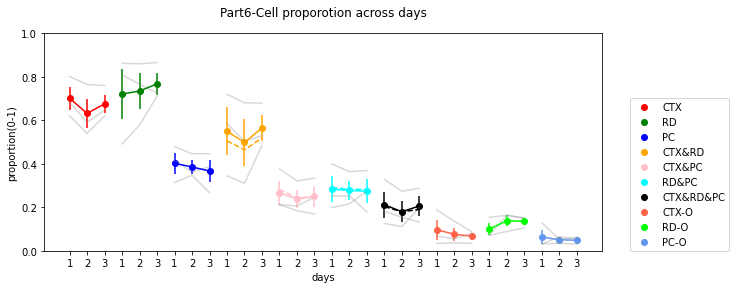

In [17]:
colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
plt.figure(figsize=(10,4))
ys=[]
handles = []
for i in range(10):
    cell_types = nums[:,:,i]
    x = np.array([1,2,3])+3*i
    y = np.mean(cell_types,axis=1)
    ys.append(y)
    sem = np.std(cell_types,axis=1,ddof=1)/np.sqrt(len(cell_types[0]))
    plt.plot(x,cell_types,color="gray",alpha=0.3)
    h = plt.scatter(x,y,color = colors[i])
    handles.append(h)
    plt.errorbar(x,y,yerr=sem,color = colors[i])
    if i == 3:
        plt.plot(x,ys[0]*ys[1],"--",color=colors[i])
    if i == 4:
        plt.plot(x,ys[0]*ys[2],"--",color=colors[i])
    if i == 5:
        plt.plot(x,ys[1]*ys[2],"--",color=colors[i])
    if i == 6:
        plt.plot(x,ys[0]*ys[1]*ys[2],"--",color=colors[i])
plt.legend(handles=handles,labels=["CTX","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.xticks(ticks=np.arange(1,31),labels=["1","2","3"]*10)
plt.xlabel("days")
plt.ylabel("proportion(0-1)")
plt.ylim(0,1)
plt.title("Part6-Cell proporotion across days",y=1.05)



### statistic

In [16]:
from mylab.ana.Mstat import *

for i in range(10):
    print("------------%s--------------"%i)
    cell_types = nums[:,:,i]
    for a,b in itertools.combinations([0,1,2],2):
        print(a,b,Wilcoxon_signed_ranktest(cell_types[a]-cell_types[b])[1])

------------0--------------
0 1 0.10880943004054568
0 2 0.17971249487899976
1 2 0.28504940740261275
------------1--------------
0 1 1.0
0 2 0.5929800980174267
1 2 0.5929800980174267
------------2--------------
0 1 0.5929800980174267
0 2 0.10880943004054568
1 2 0.6547208460185769
------------3--------------
0 1 0.10880943004054568
0 2 1.0
1 2 0.28504940740261275
------------4--------------
0 1 0.10880943004054568
0 2 0.28504940740261275
1 2 0.5929800980174267
------------5--------------
0 1 0.6547208460185769
0 2 1.0
1 2 1.0
------------6--------------
0 1 0.10880943004054568
0 2 1.0
1 2 0.5929800980174267
------------7--------------
0 1 0.28504940740261275
0 2 1.0
1 2 0.5929800980174267
------------8--------------
0 1 0.10880943004054568
0 2 0.28504940740261275
1 2 1.0
------------9--------------
0 1 1.0
0 2 0.5929800980174267
1 2 0.5929800980174267


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
